# Introduction to Synthetic Data Generation


In [ ]:
!pip install numpy pandas matplotlib sdv ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.features

# Number of samples to sample from the real heart disease dataset
NUM_HEART_DISEASE_SAMPLES = 100

# Random seed for reproducibility
np.random.seed(42)
heart_disease_sampled_df = df.sample(n=NUM_HEART_DISEASE_SAMPLES, random_state=42).reset_index(drop=True)

heart_disease_sampled_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53,1,3,130,246,1,2,173,0,0.0,1,3.0,3.0
1,54,1,4,110,206,0,2,108,1,0.0,2,1.0,3.0
2,56,1,4,125,249,1,2,144,1,1.2,2,1.0,3.0
3,58,1,4,100,234,0,0,156,0,0.1,1,1.0,7.0
4,51,0,4,130,305,0,0,142,1,1.2,2,0.0,7.0


In [41]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import Metadata

# Number of samples to generate from the synthetic heart disease dataset
NUM_HEART_DISEASE_SYNTHETIC_SAMPLES = 50

heart_disease_metadata = Metadata.detect_from_dataframe(heart_disease_sampled_df)

synthesizer = GaussianCopulaSynthesizer(heart_disease_metadata)
synthesizer.fit(heart_disease_sampled_df)
heart_disease_synthetic_data = synthesizer.sample(num_rows=NUM_HEART_DISEASE_SYNTHETIC_SAMPLES)

print(heart_disease_metadata)

heart_disease_synthetic_data.head()



/Users/brandon/Repos/synthetic-data-evaluation/env/lib/python3.9/site-packages/sdv/single_table/base.py:133: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



{
    "tables": {
        "table": {
            "columns": {
                "age": {
                    "sdtype": "numerical"
                },
                "sex": {
                    "sdtype": "categorical"
                },
                "cp": {
                    "sdtype": "categorical"
                },
                "trestbps": {
                    "sdtype": "numerical"
                },
                "chol": {
                    "sdtype": "numerical"
                },
                "fbs": {
                    "sdtype": "categorical"
                },
                "restecg": {
                    "sdtype": "categorical"
                },
                "thalach": {
                    "sdtype": "numerical"
                },
                "exang": {
                    "sdtype": "categorical"
                },
                "oldpeak": {
                    "sdtype": "numerical"
                },
                "slope": {
                    "s

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,60,1,2,131,329,0,2,122,0,1.3,1,0.0,3.0
1,68,1,4,125,226,0,2,161,0,0.0,2,2.0,7.0
2,54,1,4,151,204,0,2,168,1,0.0,1,2.0,7.0
3,63,1,4,140,224,1,0,115,1,0.1,1,1.0,7.0
4,63,0,4,113,186,0,0,132,1,0.1,2,2.0,7.0


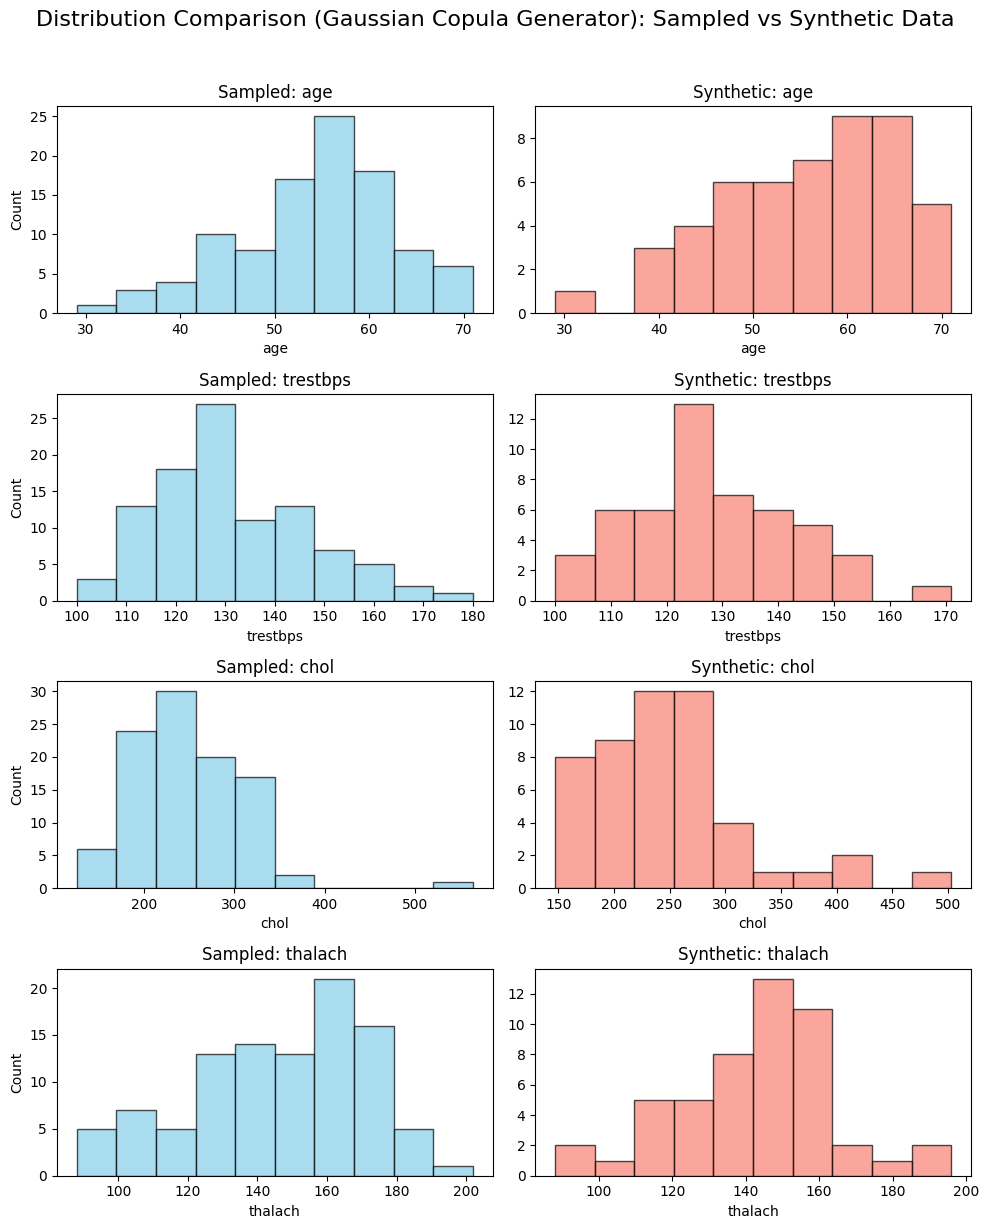

In [35]:
import matplotlib.pyplot as plt

# Select a few columns to compare
columns_to_compare = ['age', 'trestbps', 'chol', 'thalach']

fig, axes = plt.subplots(len(columns_to_compare), 2, figsize=(10, 3 * len(columns_to_compare)))
fig.suptitle('Distribution Comparison (Gaussian Copula Generator): Sampled vs Synthetic Data', fontsize=16, y=1.02)

for i, col in enumerate(columns_to_compare):
    # Plot for sampled data
    axes[i, 0].hist(heart_disease_sampled_df[col], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i, 0].set_title(f'Sampled: {col}')
    axes[i, 0].set_ylabel('Count')
    
    # Plot for synthetic data
    axes[i, 1].hist(heart_disease_synthetic_data[col], bins=10, color='salmon', edgecolor='black', alpha=0.7)
    axes[i, 1].set_title(f'Synthetic: {col}')
    
    # Set x-labels
    axes[i, 0].set_xlabel(col)
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()
